In [70]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator
%matplotlib inline


In [62]:
# Load the data from the passage-based anaylsis
pass_df = pd.read_csv('/mnt/bigdisk1/AllieSpangaro/Senesence_Classification/Results/BetaGal_Oct21Set.csv')

def passage_group(passage_num):
    #use this function to group passages into groups for plotting
    passage = 'P' + str(passage_num)
    passage_group_dict = {}
    passage_groups = ['P6-8','P9-10','P11-13','P14-16','P17-18','P20-21','P22-24']
    for group in passage_groups:
        if group == 'P6-8':
            passage_group_dict['P6'] = 'P6-8'
            passage_group_dict['P7'] = 'P6-8'
            passage_group_dict['P8'] = 'P6-8'
        elif group == 'P9-10':
            passage_group_dict['P9'] = 'P9-10'
            passage_group_dict['P10'] = 'P9-10'
        elif group == 'P11-13':
            passage_group_dict['P11'] = 'P11-13'
            passage_group_dict['P12'] = 'P11-13'
            passage_group_dict['P13'] = 'P11-13'
        elif group == 'P14-16':
            passage_group_dict['P14'] = 'P14-16'
            passage_group_dict['P15'] = 'P14-16'
            passage_group_dict['P16'] = 'P14-16'
        elif group == 'P17-18':
            passage_group_dict['P17'] = 'P17-18'
            passage_group_dict['P18'] = 'P17-18'
        elif group == 'P20-21':
            passage_group_dict['P20'] = 'P20-21'
            passage_group_dict['P21'] = 'P20-21'
        elif group == 'P22-24':
            passage_group_dict['P22'] = 'P22-24'
            passage_group_dict['P23'] = 'P22-24'
            passage_group_dict['P24'] = 'P22-24'
            
    #return the group that the passage number belongs to
    return passage_group_dict[passage]

pass_df['Passage Group'] = pass_df['Passage Number'].apply(passage_group)

In [55]:
# Load the CSV files into a pandas DataFrame
df_r1 = pd.read_csv('/mnt/bigdisk1/AllieSpangaro/Senesence_Classification/Results/Xgal_Optimization _Concentrations_R1.csv')
df_r2 = pd.read_csv('/mnt/bigdisk1/AllieSpangaro/Senesence_Classification/Results/Xgal_Optimization _Concentrations_R2.csv')

#add the replicate number to each df and concatenate them into the main df
df_r1["Replicate"] = "r1"
df_r2["Replicate"] = "r2"
df = pd.concat([df_r1,df_r2], ignore_index=True)

df.tail()

,OrigFileNumber,ImageNumber,Condition,Concentration,Total Cells,Total BetaGal Positive,Positive Object Numbers,% Positive,CoµMents,BF or DIC,Replicate
280,1,23,H2O2,50µM,34,10,"1,2,11,12,13,20,27,31,29,28",29.411765,NaN,DIC,r2
281,2,24,H2O2,50µM,52,22,"2,3,4,7,8,10,17,23,21,22,28,33,30,42,30,39,52,...",42.307692,NaN,DIC,r2
282,3,25,H2O2,50µM,30,12,"3,4,7,9,21,13,27,30,24,26,20,17",40.000000,"8,11 split, 13,14 split",DIC,r2
283,4,26,H2O2,50µM,77,38,"1,2,3,4,5,6,8,11,12,13,9,16,18,19,22,27,33,29,...",49.350649,"36,34 split, 64,65 split",DIC,r2
284,5,27,H2O2,50µM,37,19,"1,3,7,6,10,22,21,18,11,12,17,20,24,30,36,31,38...",51.351351,"32,34,35 split",DIC,r2


In [56]:
#Now make a column to group by Doxo and its control (DMSO) and H2O2 and its control (water)

df["Experiment"] = df["Condition"].apply(lambda x: "Doxorubicin" if x == "DMSO" or x == "Doxo" else "H2O2")
#Also remove nans to make it so Concentration has a control value
df['Concentration'] = df['Concentration'].fillna('Control')

# Define the order of the categories
doxo_conc_order = ['Control', '25nM', '50nM', '100nM', '200nM', '250nM', '300nM']
peroxide_conc_order = ['Control','25µM', '50µM', '100µM', '200µM', '300µM', '400µM']
full_order = ['Control','25nM', '50nM', '100nM', '200nM', '250nM', '300nM','25µM', '50µM', '100µM', '200µM', '300µM', '400µM']

# can also do subset_df = df[df['Condition'].isin(['A', 'B'])]
doxo_df = df[df['Experiment'].isin(['Doxorubicin'])]
peroxide_df = df[df['Experiment'].isin(['H2O2'])]
# filter DFs to only have their categories
doxo_df['Concentration'] = pd.Categorical(doxo_df['Concentration'], categories=doxo_conc_order, ordered=True)
peroxide_df['Concentration'] = pd.Categorical(peroxide_df['Concentration'], categories=peroxide_conc_order, ordered=True)
df['Concentration'] = pd.Categorical(df['Concentration'], categories=full_order, ordered=True)



#df['Category'] = df['Condition'].apply(lambda x: 'High' if x == 'A' else 'Medium' if x == 'B' else 'Low')


/tmp/ipykernel_175926/1070544684.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doxo_df['Concentration'] = pd.Categorical(doxo_df['Concentration'], categories=doxo_conc_order, ordered=True)
/tmp/ipykernel_175926/1070544684.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  peroxide_df['Concentration'] = pd.Categorical(peroxide_df['Concentration'], categories=peroxide_conc_order, ordered=True)


/home/mattiazzilab/.conda/envs/jupyter/lib/python3.13/site-packages/seaborn/categorical.py:3399: UserWarning: 7.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


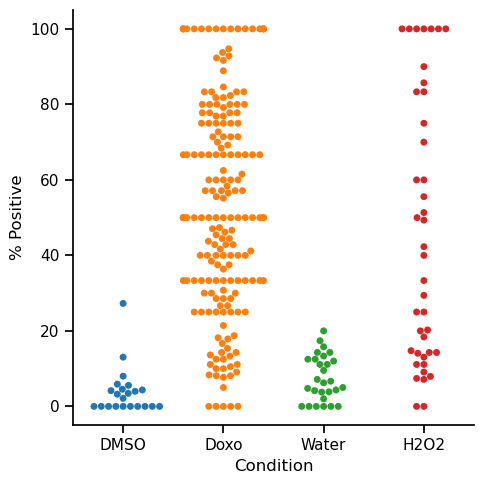

In [58]:
# Create the figure and axis bar plot using seaborn and matplotlib
#fig, ax = plt.subplots(figsize=(11, 6))

#initiate the seaborn barplot
sns.set_context("notebook")
sns.catplot(data=df, x="Condition", y="% Positive", hue = "Condition", kind="swarm")

# Add labels and title
#ax.set_xlabel("Total BetaGal Positive")
#ax.set_ylabel("Density")
#ax.set_title("Replicat")


# Display the plot
plt.show()

In [82]:
#Helper function to make the plot
def betagal_barplot_concs(ax,data,x,y,palette):
    g = sns.boxplot(ax=ax, data=data, x=x, y=y, hue = x, palette=palette)
    ax.set_ylim([0,101])
    ax.set_xlabel("Concentration", fontsize="large")
    ax.set_ylabel("Percent β-gal Positive",fontsize="large")
    ax.set_title(data['Experiment'].values[0] + ' ' + data['Replicate'].values[0])
    return g

def betagal_barplot_passages(ax,data,x,y,palette):
    g = sns.boxplot(ax=ax, data=data, x=x, y=y, hue = "Condition", palette=palette)
    sns.despine()
    ax.set_ylim([0,100])
    ax.set_xlabel("Passage", fontsize="large")
    ax.set_ylabel("Percent β-gal Positive",fontsize="large")
    return g

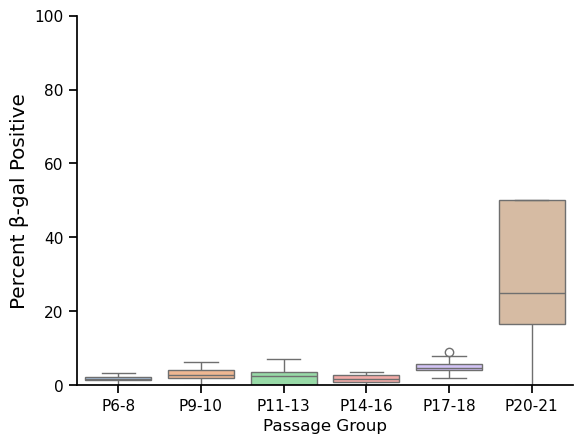

<Figure size 640x480 with 0 Axes>

In [78]:
#Make a plot for the passage data
#fig,axs = plt.subplots(nrows=2)
fig = sns.boxplot(data=pass_df, x="Passage Group", y="% Positive", hue = "Passage Group", palette="pastel")
sns.despine()

plt.ylim([0,100])
plt.ylabel("Percent β-gal Positive",fontsize="large")
plt.show()
plt.savefig("PassageGroupPlot.png")

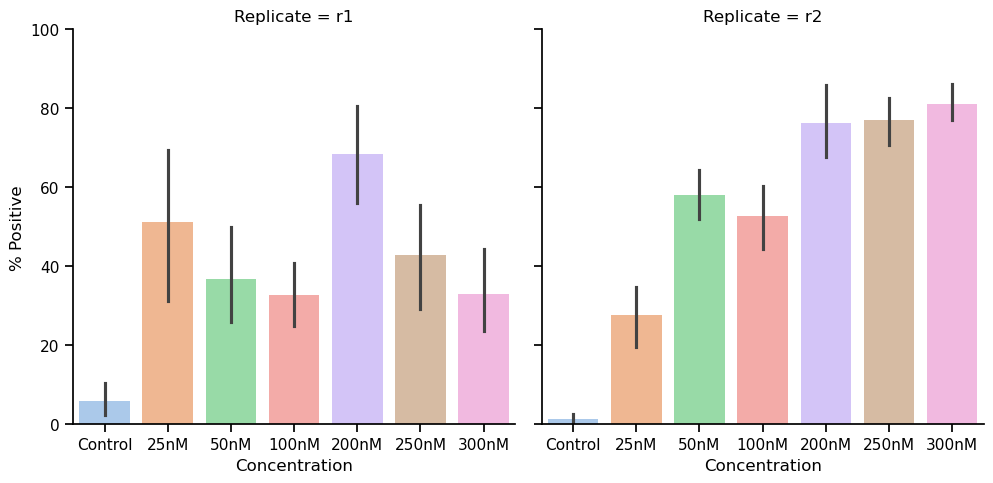

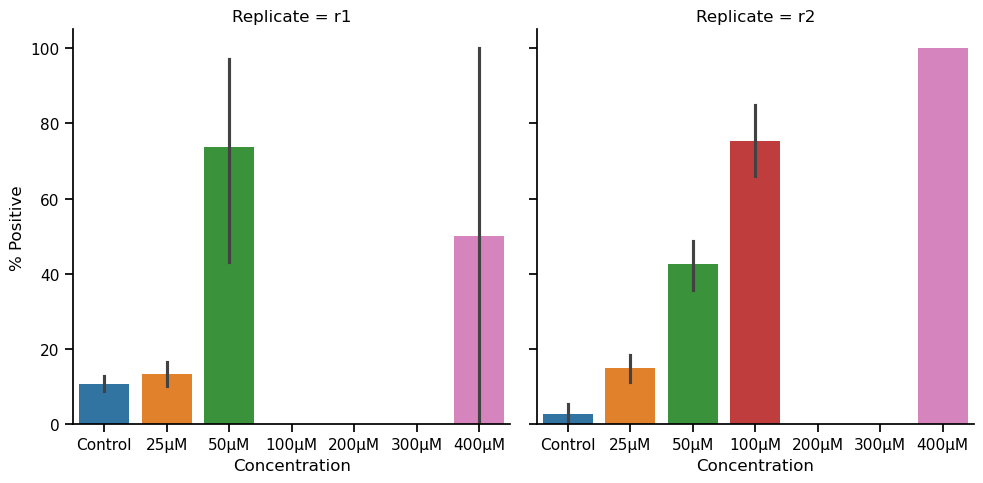

In [136]:
#Make a side by side plot for each experiment type only
#fig,axs = plt.subplots(nrows=2)
sns.catplot(data=doxo_df, x="Concentration", y="% Positive", hue = "Concentration", col ="Replicate", kind="bar", palette="pastel")
plt.ylim([0,100])

#plt.savefig("/Users/allielas/Desktop/Active Projects/Image Analysis/BetaGalData/dmsoplots.png")
sns.catplot(data=peroxide_df, x="Concentration", y="% Positive", hue = "Concentration", col = "Replicate", kind="bar")

#plt.savefig("/Users/allielas/Desktop/Active Projects/Image Analysis/BetaGalData/h2o2plots.png")
plt.ylabel("Percent Positive Per Image")
plt.show()

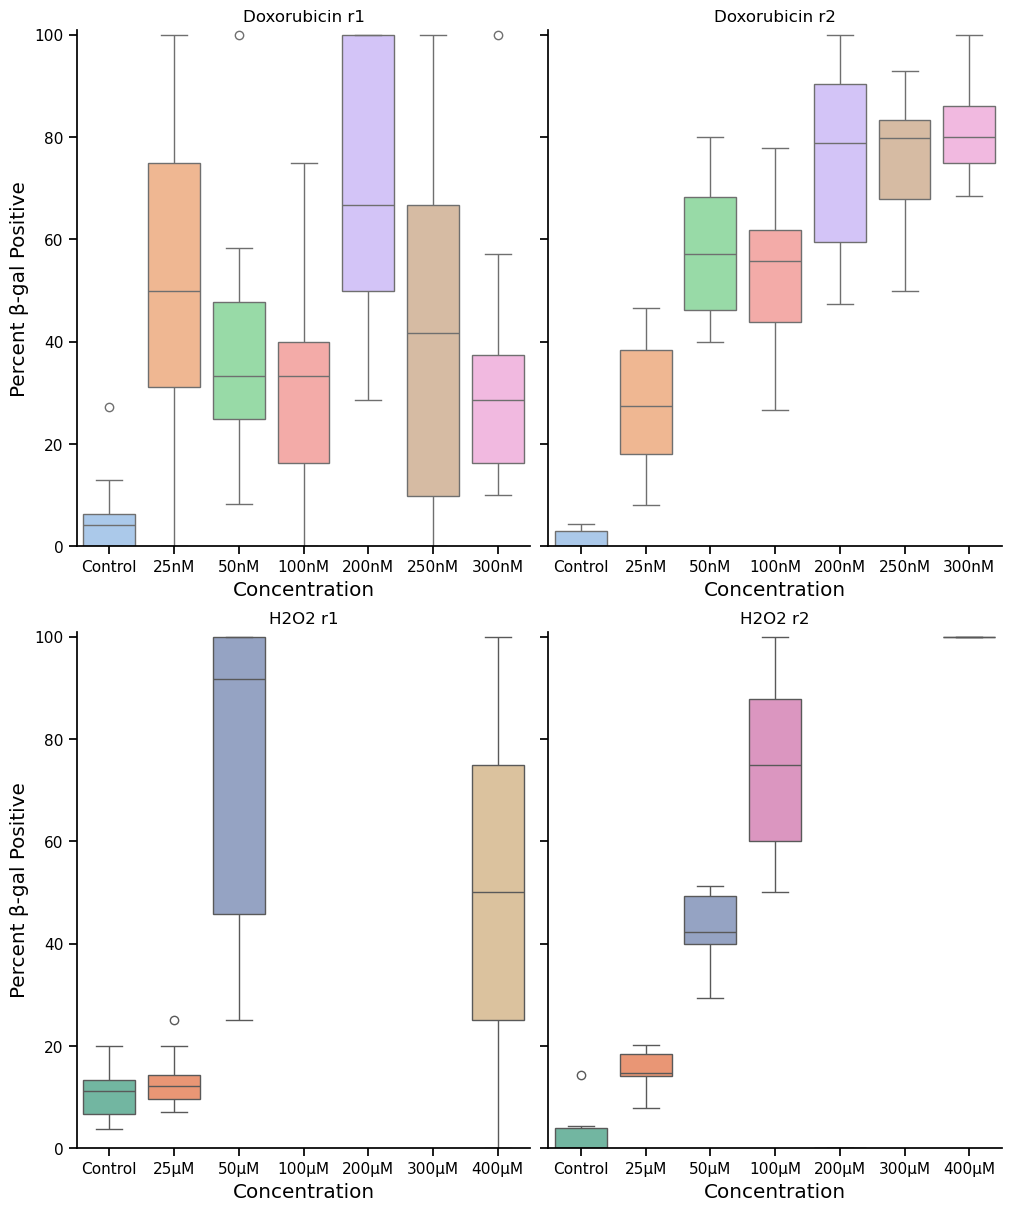

In [88]:
#Make a side by side plot for each experiment type only
fig,axs = plt.subplots(2,2,sharey=True, layout='constrained')
fig.set_size_inches(10,12)

betagal_barplot_concs(axs[0,0],data=doxo_df[doxo_df['Replicate'] == 'r1'],x="Concentration",y="% Positive",palette='pastel')
betagal_barplot_concs(axs[0,1],data=doxo_df[doxo_df['Replicate'] == 'r2'],x="Concentration",y="% Positive",palette='pastel')

betagal_barplot_concs(axs[1,0],data=peroxide_df[peroxide_df['Replicate'] == 'r1'],x="Concentration",y="% Positive",palette='Set2')
betagal_barplot_concs(axs[1,1],data=peroxide_df[peroxide_df['Replicate'] == 'r2'],x="Concentration",y="% Positive",palette='Set2')

#plt.tight_layout()
sns.despine()
plt.show()
fig.savefig("ConcentrationBoxplots.png")
#fig.savefig("/Users/allielas/Desktop/Active Projects/Image Analysis/BetaGalData/4x4boxplots.png")


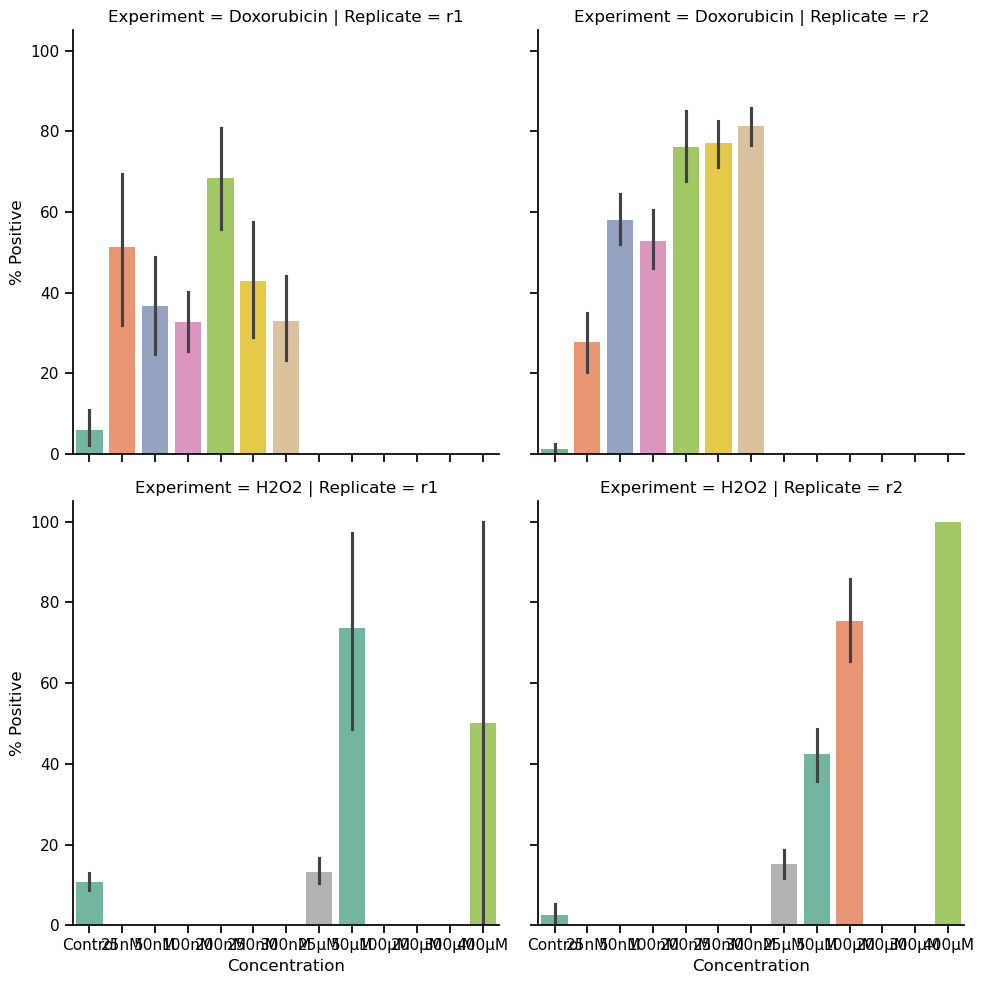

<Figure size 640x480 with 0 Axes>

In [46]:
sns.catplot(data=df, x="Concentration", y="% Positive", hue = "Concentration", row = 'Experiment',col = "Replicate", kind="bar", palette="Set2")
plt.tight_layout()
plt.show()
plt.savefig("/Users/allielas/Desktop/Active Projects/Image Analysis/BetaGalData/4x4.png")

# Don't do this one; 
mistakes were made but keeping for completion
- No need to manually calculate the averages; the barplot will already show the central tendency


/var/folders/yd/1fhlg3pn6d74xlj_wkkzgcrc0000gn/T/ipykernel_15246/1626342174.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_positive_doxo = doxo_df.groupby(['Concentration','Replicate']).agg({'Total BetaGal Positive':'sum','Total Cells':'sum'}).reset_index()
/var/folders/yd/1fhlg3pn6d74xlj_wkkzgcrc0000gn/T/ipykernel_15246/1626342174.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_positive_h2o2 = peroxide_df.groupby(['Concentration','Replicate']).agg({'Total BetaGal Positive':'sum','Total Cells':'sum'}).reset_index()


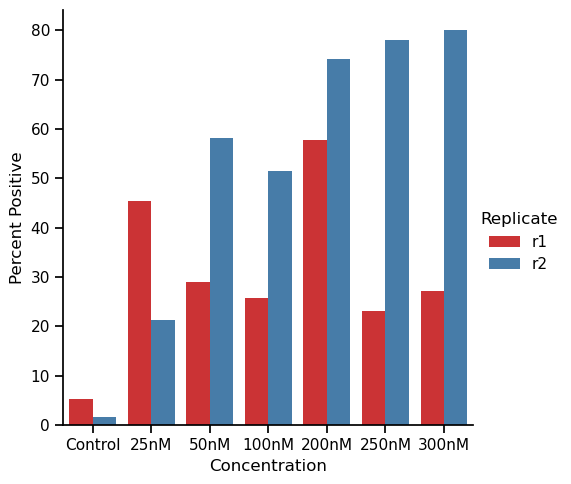

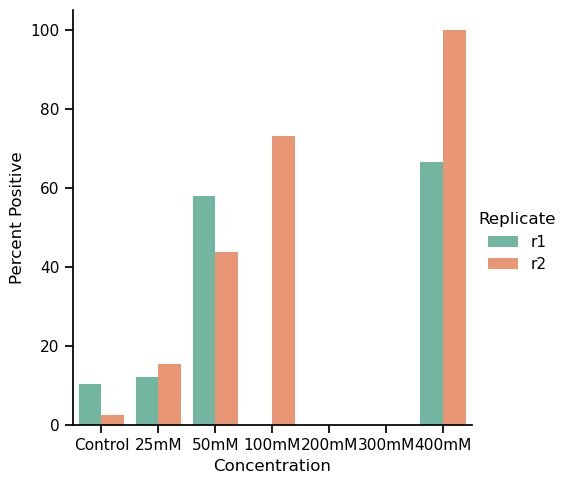

In [6]:
#Make a plot with average Total BetaGal Positive per concentration per condtion using a groupby function
# Group by concentration category,replicate and calculate the average percentage
average_positive_doxo = doxo_df.groupby(['Concentration','Replicate']).agg({'Total BetaGal Positive':'sum','Total Cells':'sum'}).reset_index()
average_positive_doxo['Percent Positive'] = average_positive_doxo['Total BetaGal Positive'] / average_positive_doxo['Total Cells'] * 100

average_positive_h2o2 = peroxide_df.groupby(['Concentration','Replicate']).agg({'Total BetaGal Positive':'sum','Total Cells':'sum'}).reset_index()
average_positive_h2o2['Percent Positive'] = average_positive_h2o2['Total BetaGal Positive'] / average_positive_h2o2['Total Cells'] * 100


sns.catplot(data=average_positive_doxo, x="Concentration", y="Percent Positive", hue ="Replicate", kind="bar", palette='Set1')
sns.catplot(data=average_positive_h2o2, x="Concentration", y="Percent Positive", hue ="Replicate", kind="bar", palette='Set2')

plt.show()

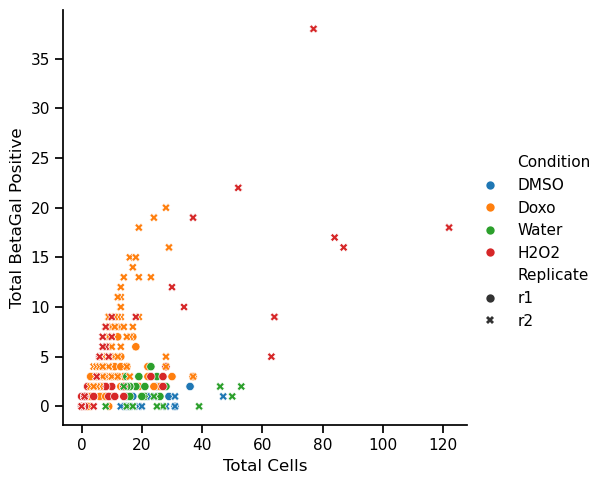

In [7]:
sns.relplot(data=df, x="Total Cells", y="Total BetaGal Positive", hue = "Condition", style ="Replicate", kind = "scatter")
plt.show()

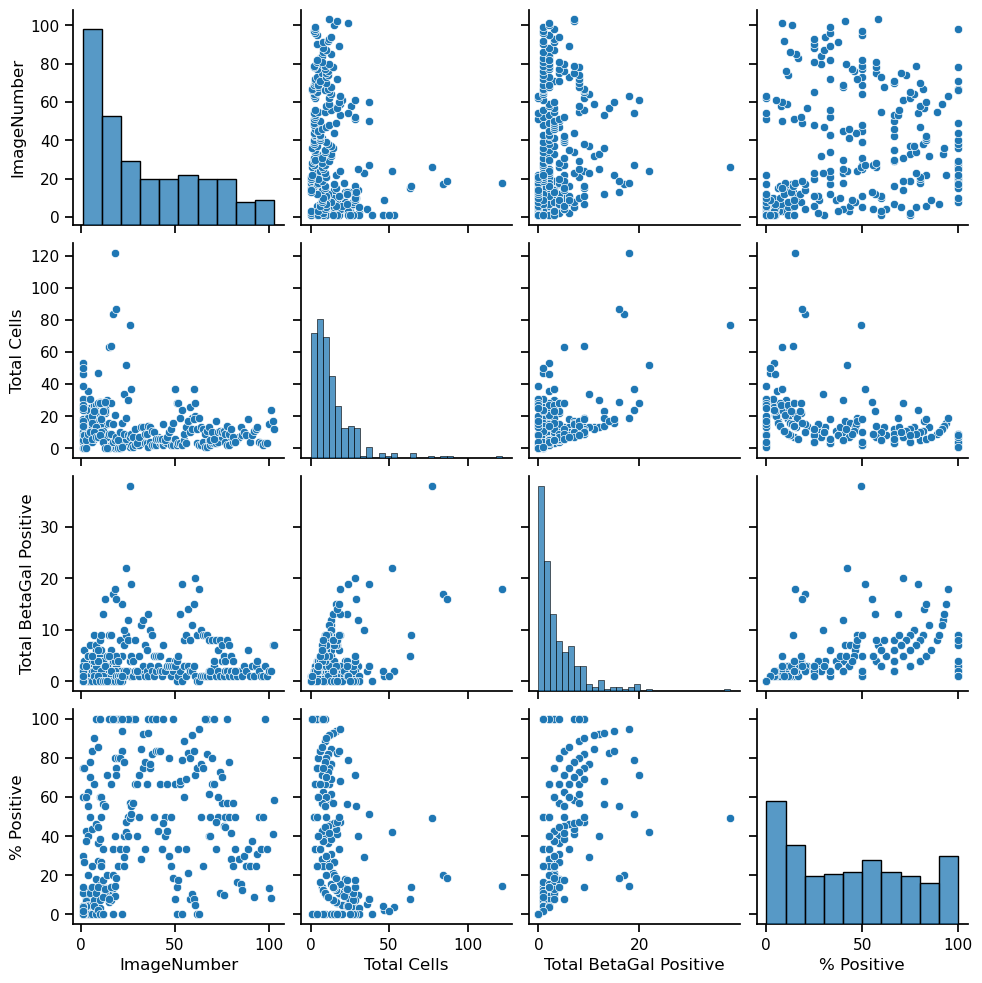

In [11]:
sns.pairplot(data=df)
plt.show()